In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_excel("Data_Train.xlsx")
df_test = pd.read_excel("Data_Test.xlsx")

In [3]:
df_train.shape

(6237, 9)

In [4]:
df_test.shape

(1560, 8)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [6]:
df_train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Title,6237,5568,A Game of Thrones (A Song of Ice and Fire),4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Author,6237,3679,Agatha Christie,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edition,6237,3370,"Paperback,– 5 Oct 2017",48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviews,6237,36,5.0 out of 5 stars,1375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ratings,6237,342,1 customer review,1040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Synopsis,6237,5549,A Tinkle Double Digest is two Tinkle Digests i...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,6237,345,Action & Adventure (Books),947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BookCategory,6237,11,Action & Adventure,818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,6237.0,NaN,NaN,NaN,560.707516,690.110657,25.0,249.18,373.0,599.0,14100.0


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1560 non-null   object
 1   Author        1560 non-null   object
 2   Edition       1560 non-null   object
 3   Reviews       1560 non-null   object
 4   Ratings       1560 non-null   object
 5   Synopsis      1560 non-null   object
 6   Genre         1560 non-null   object
 7   BookCategory  1560 non-null   object
dtypes: object(8)
memory usage: 97.6+ KB


In [8]:
df_test.describe(include="all").T

,count,unique,top,freq
Title,1560,1521,The Five Greatest Warriors (Jack West Series),3
Author,1560,1224,Agatha Christie,18
Edition,1560,1259,"Paperback,– 5 Oct 2017",12
Reviews,1560,30,5.0 out of 5 stars,376
Ratings,1560,163,1 customer review,288
Synopsis,1560,1519,The end is approaching ... Can Jack West unrav...,3
Genre,1560,225,Action & Adventure (Books),236
BookCategory,1560,11,Action & Adventure,218


In [9]:
df_train.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price'],
      dtype='object')

In [10]:
df_train_original = df_train.copy()
df_test_original = df_test.copy()

In [11]:
duplicate = df_train[df_train.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price


In [12]:
### Examine missing values
df_na = df_train.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

Series([], dtype: int64)

In [13]:
df_train.isnull().sum().sort_values(ascending = False)/df_train.index.size

Title           0.0
Author          0.0
Edition         0.0
Reviews         0.0
Ratings         0.0
Synopsis        0.0
Genre           0.0
BookCategory    0.0
Price           0.0
dtype: float64

In [14]:
df_train['Reviews'] = df_train['Reviews'].str[:3]

In [15]:
df_train

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62
...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",5.0,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology (Books),Humour,322.00
6233,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3,9 customer reviews,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",421.00
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",3.8,3 customer reviews,'The most refreshing and radiant love story yo...,Romance (Books),Romance,399.00
6235,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure (Books),Action & Adventure,319.00


In [16]:
df_train.Reviews.value_counts()

5.0    1375
4.0     570
4.5     507
4.6     394
4.4     389
4.3     359
4.7     343
4.2     324
4.1     310
3.9     241
4.8     222
3.8     190
3.7     167
3.0     138
3.5     115
3.6     110
4.9      75
3.4      75
3.3      57
1.0      49
3.1      49
3.2      41
2.0      39
2.9      26
2.5      18
2.7      16
2.8      10
2.3       7
1.5       5
2.6       4
2.4       4
2.2       3
1.4       2
1.7       1
2.1       1
1.6       1
Name: Reviews, dtype: int64

<ipython-input-17-bb28ea0cf3e9>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


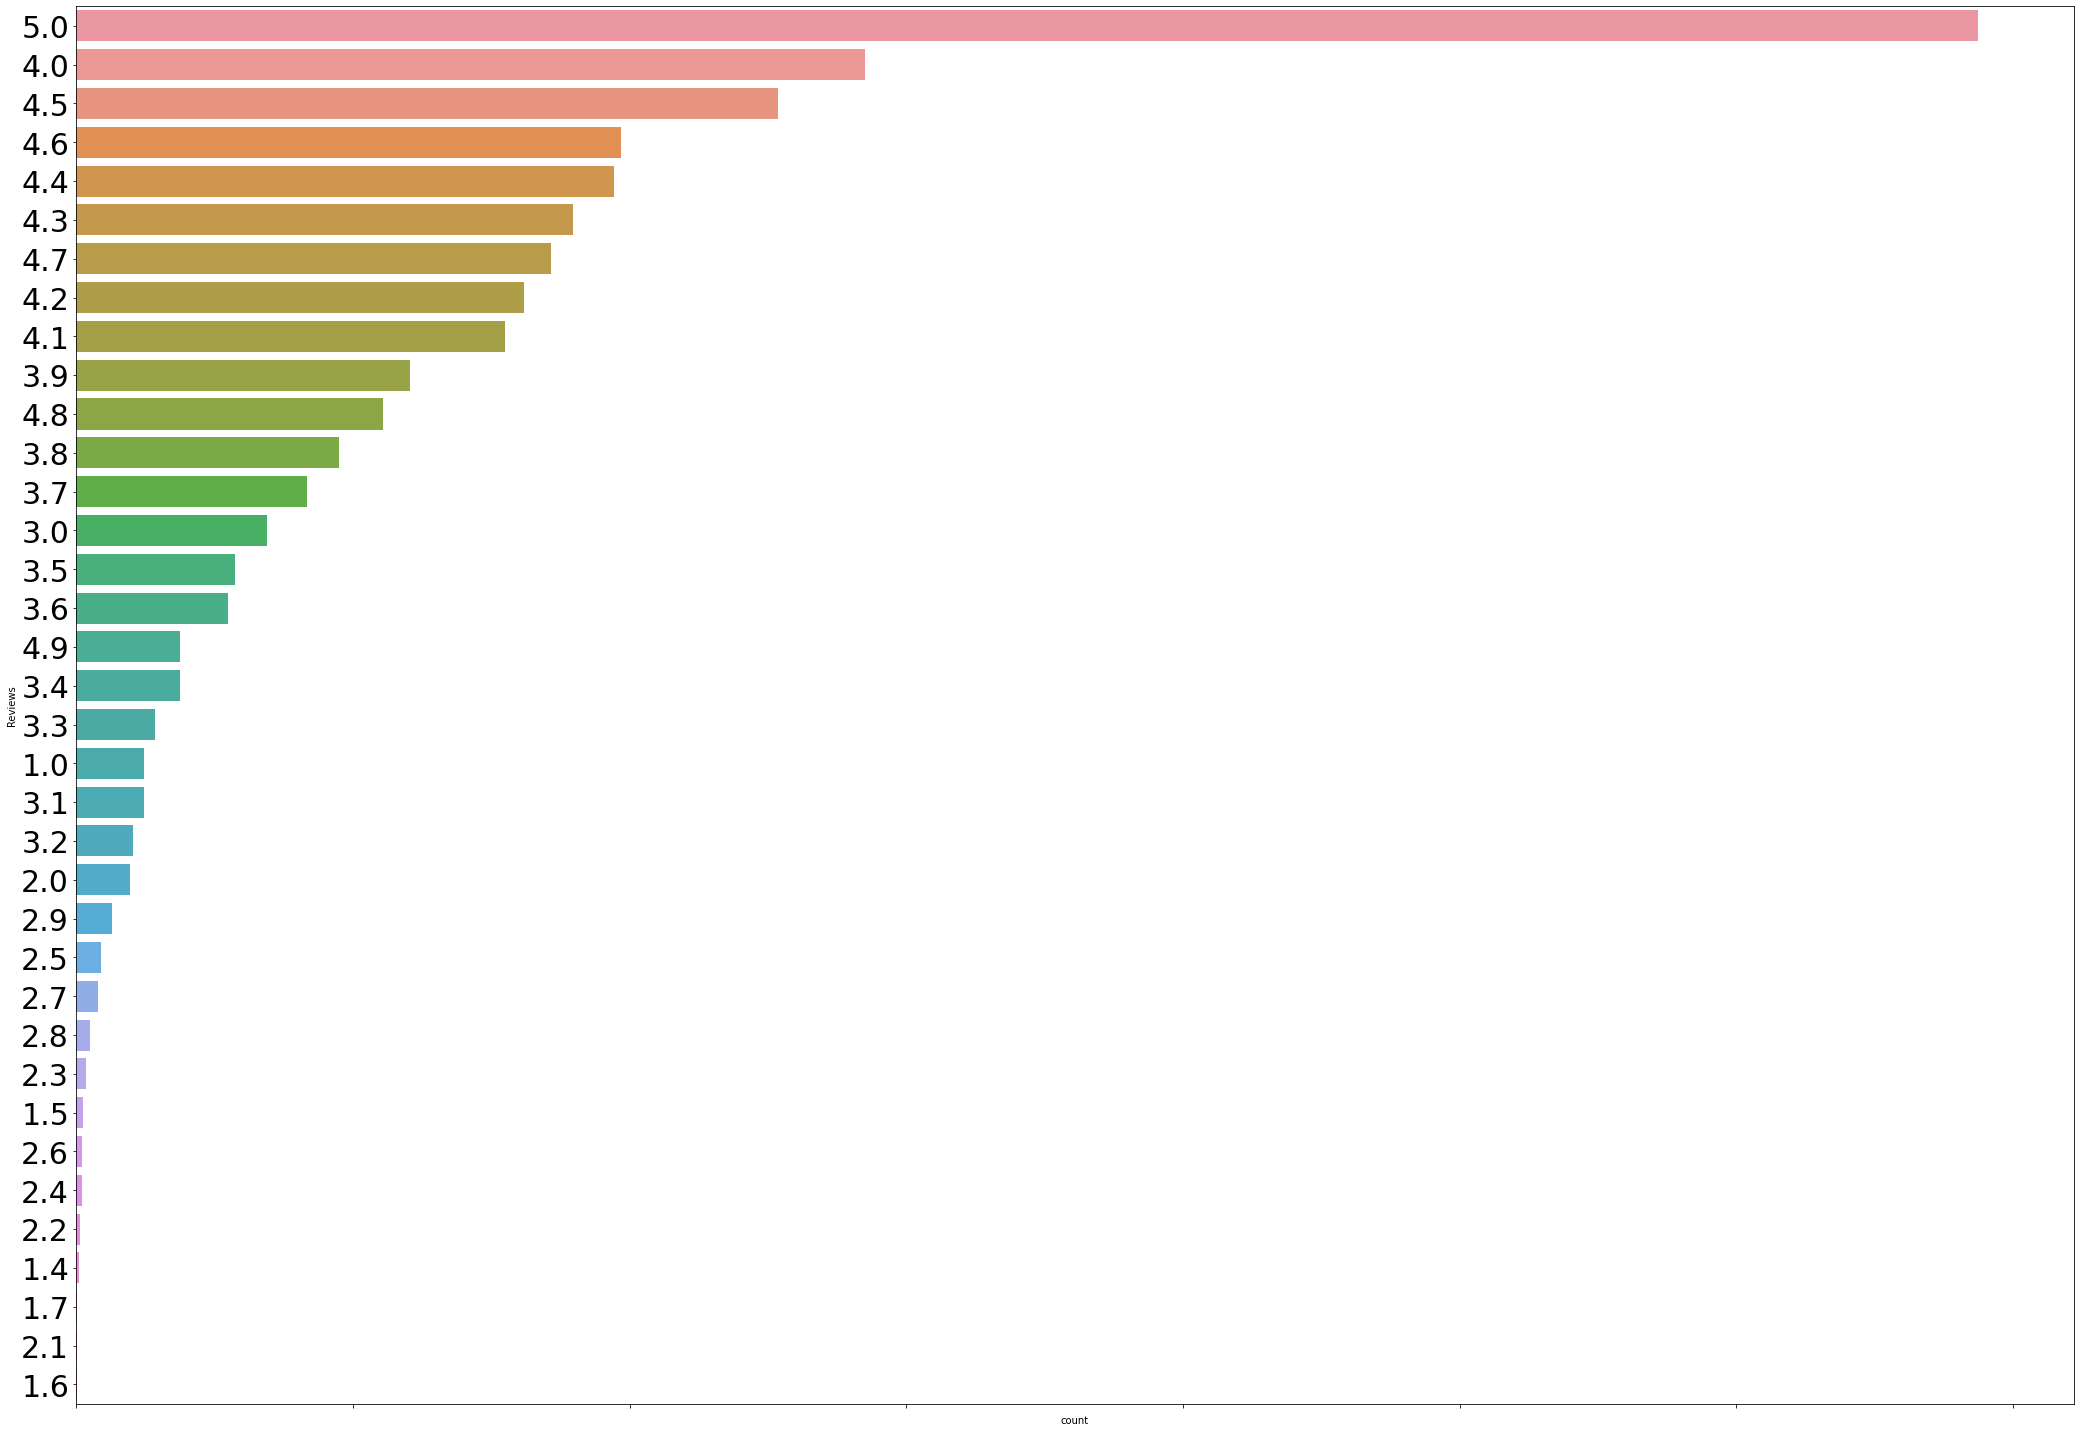

In [17]:
plt.figure(figsize=(29,20))
ax = sns.countplot(y="Reviews", data=df_train, order = df_train['Reviews'].value_counts().index)
plt.yticks(fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")



plt.tight_layout()
plt.show()

In [18]:
df_train['Ratings'] = df_train['Ratings'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

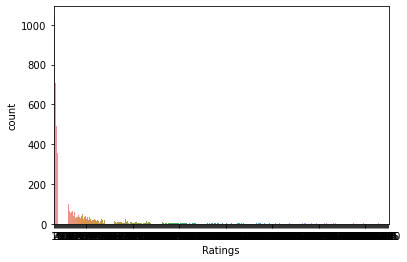

In [19]:
ax = sns.countplot(x="Ratings", data=df_train)

In [20]:
df_train.BookCategory.value_counts()

Action & Adventure                      818
Crime, Thriller & Mystery               723
Biographies, Diaries & True Accounts    596
Language, Linguistics & Writing         594
Comics & Mangas                         583
Romance                                 560
Humour                                  540
Arts, Film & Photography                517
Computing, Internet & Digital Media     510
Sports                                  471
Politics                                325
Name: BookCategory, dtype: int64

In [21]:
df_train["Print"]=np.where(df_train["Edition"].str.contains(r'Paperback'),'Paperback','Hardcover')

In [22]:
df_train['Year'] = df_train['Edition'].str[-4:]

In [23]:
df_train

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Print,Year
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,2012
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,2006
...,...,...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",5.0,2,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology (Books),Humour,322.00,Paperback,2018
6233,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3,9,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",421.00,Paperback,2016
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",3.8,3,'The most refreshing and radiant love story yo...,Romance (Books),Romance,399.00,Paperback,2006
6235,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5,4,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure (Books),Action & Adventure,319.00,Paperback,2015


In [24]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df_train['Title']= label_encoder.fit_transform(df_train['Title'])
df_train['Author']= label_encoder.fit_transform(df_train['Author'])
df_train['Edition']= label_encoder.fit_transform(df_train['Edition'])
df_train['Genre']= label_encoder.fit_transform(df_train['Genre'])
df_train['BookCategory']= label_encoder.fit_transform(df_train['BookCategory'])
df_train['Print']= label_encoder.fit_transform(df_train['Print'])
df_train['Year']= label_encoder.fit_transform(df_train['Year'])




In [25]:
df_train.drop('Synopsis', axis=1, inplace=True)

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   int32  
 1   Author        6237 non-null   int32  
 2   Edition       6237 non-null   int32  
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   int32  
 5   Genre         6237 non-null   int32  
 6   BookCategory  6237 non-null   int32  
 7   Price         6237 non-null   float64
 8   Print         6237 non-null   int32  
 9   Year          6237 non-null   int32  
dtypes: float64(1), int32(8), object(1)
memory usage: 292.5+ KB


In [27]:
df_train['Reviews'] = pd.to_numeric(df_train['Reviews'], errors='coerce')

In [28]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [29]:
((df_train > UL) | (df_train < LL)).sum()

Title             0
Author            0
Edition           0
Reviews         160
Ratings         756
Genre             0
BookCategory      0
Price           597
Print           884
Year            439
dtype: int64

In [30]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_train[column].describe(),end=' ')
    
    
    plt.figure(figsize=(4,4))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    plt.hist(x=df_train[column])
    plt.show()
    
    plt.figure(figsize=(4,4))
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_train[column])

    plt.show()

In [31]:
df_num2 = df_train.select_dtypes(include = ['float64', 'int64','int32'])
lstnumericcolumns = list(df_num2.columns.values)
len(lstnumericcolumns)

10

Description of Title
----------------------------------------------------------------------------
count    6237.000000
mean     2782.260061
std      1614.438441
min         0.000000
25%      1374.000000
50%      2797.000000
75%      4178.000000
max      5567.000000
Name: Title, dtype: float64 Distribution of Title
----------------------------------------------------------------------------


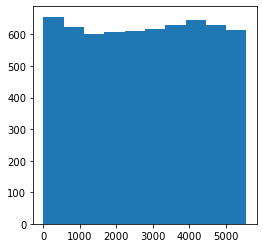

BoxPlot of Title
----------------------------------------------------------------------------


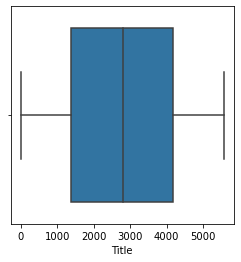

Description of Author
----------------------------------------------------------------------------
count    6237.000000
mean     1795.325317
std      1058.152146
min         0.000000
25%       893.000000
50%      1787.000000
75%      2699.000000
max      3678.000000
Name: Author, dtype: float64 Distribution of Author
----------------------------------------------------------------------------


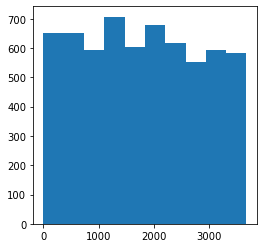

BoxPlot of Author
----------------------------------------------------------------------------


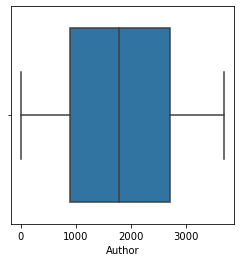

Description of Edition
----------------------------------------------------------------------------
count    6237.000000
mean     1734.837101
std       901.926928
min         0.000000
25%       992.000000
50%      1749.000000
75%      2485.000000
max      3369.000000
Name: Edition, dtype: float64 Distribution of Edition
----------------------------------------------------------------------------


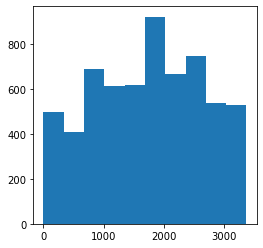

BoxPlot of Edition
----------------------------------------------------------------------------


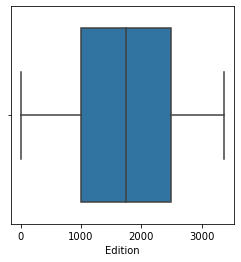

Description of Reviews
----------------------------------------------------------------------------
count    6237.000000
mean        4.293202
std         0.662501
min         1.000000
25%         4.000000
50%         4.400000
75%         4.800000
max         5.000000
Name: Reviews, dtype: float64 Distribution of Reviews
----------------------------------------------------------------------------


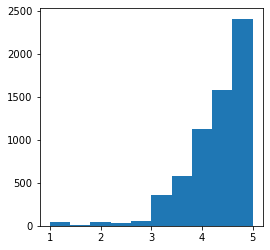

BoxPlot of Reviews
----------------------------------------------------------------------------


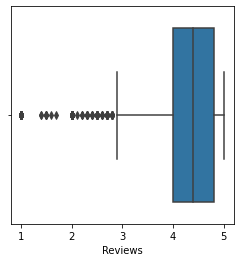

Description of Ratings
----------------------------------------------------------------------------
count    6237.000000
mean       35.984287
std       149.995031
min         1.000000
25%         2.000000
50%         7.000000
75%        22.000000
max      6090.000000
Name: Ratings, dtype: float64 Distribution of Ratings
----------------------------------------------------------------------------


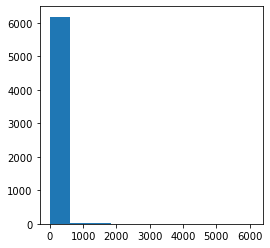

BoxPlot of Ratings
----------------------------------------------------------------------------


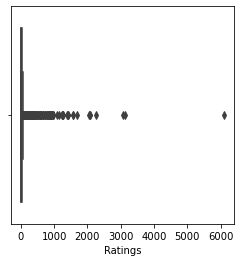

Description of Genre
----------------------------------------------------------------------------
count    6237.000000
mean      136.275453
std       103.891373
min         0.000000
25%        34.000000
50%       103.000000
75%       218.000000
max       344.000000
Name: Genre, dtype: float64 Distribution of Genre
----------------------------------------------------------------------------


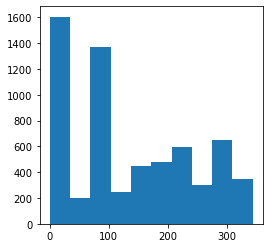

BoxPlot of Genre
----------------------------------------------------------------------------


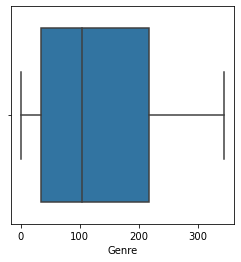

Description of BookCategory
----------------------------------------------------------------------------
count    6237.000000
mean        4.627385
std         3.169320
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: BookCategory, dtype: float64 Distribution of BookCategory
----------------------------------------------------------------------------


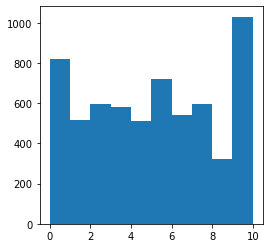

BoxPlot of BookCategory
----------------------------------------------------------------------------


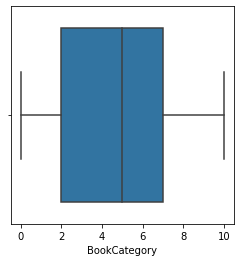

Description of Price
----------------------------------------------------------------------------
count     6237.000000
mean       560.707516
std        690.110657
min         25.000000
25%        249.180000
50%        373.000000
75%        599.000000
max      14100.000000
Name: Price, dtype: float64 Distribution of Price
----------------------------------------------------------------------------


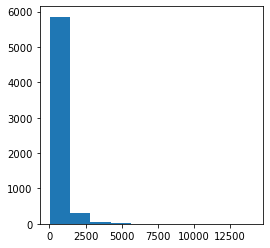

BoxPlot of Price
----------------------------------------------------------------------------


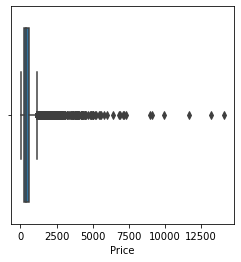

Description of Print
----------------------------------------------------------------------------
count    6237.000000
mean        0.858265
std         0.348806
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Print, dtype: float64 Distribution of Print
----------------------------------------------------------------------------


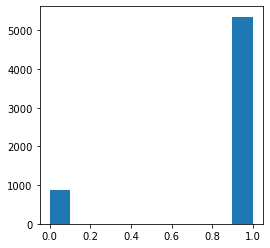

BoxPlot of Print
----------------------------------------------------------------------------


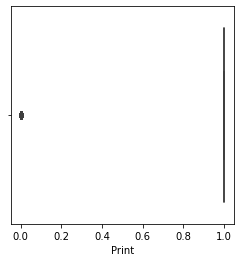

Description of Year
----------------------------------------------------------------------------
count    6237.000000
mean       48.900112
std         7.759006
min         0.000000
25%        47.000000
50%        52.000000
75%        54.000000
max        63.000000
Name: Year, dtype: float64 Distribution of Year
----------------------------------------------------------------------------


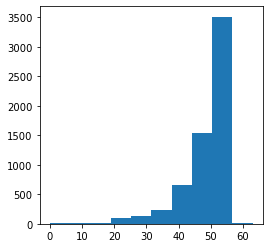

BoxPlot of Year
----------------------------------------------------------------------------


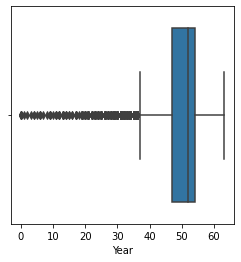

In [32]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

<AxesSubplot:>

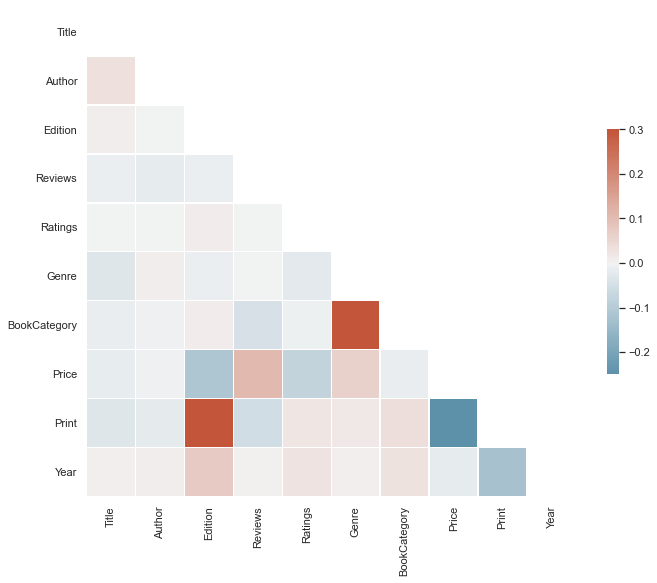

In [33]:
#sns.heatmap(df_imputed.corr(),annot=True);
#ax = sns.heatmap(df_imputed.corr(), annot=True, fmt="f")


from string import ascii_letters


sns.set_theme(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

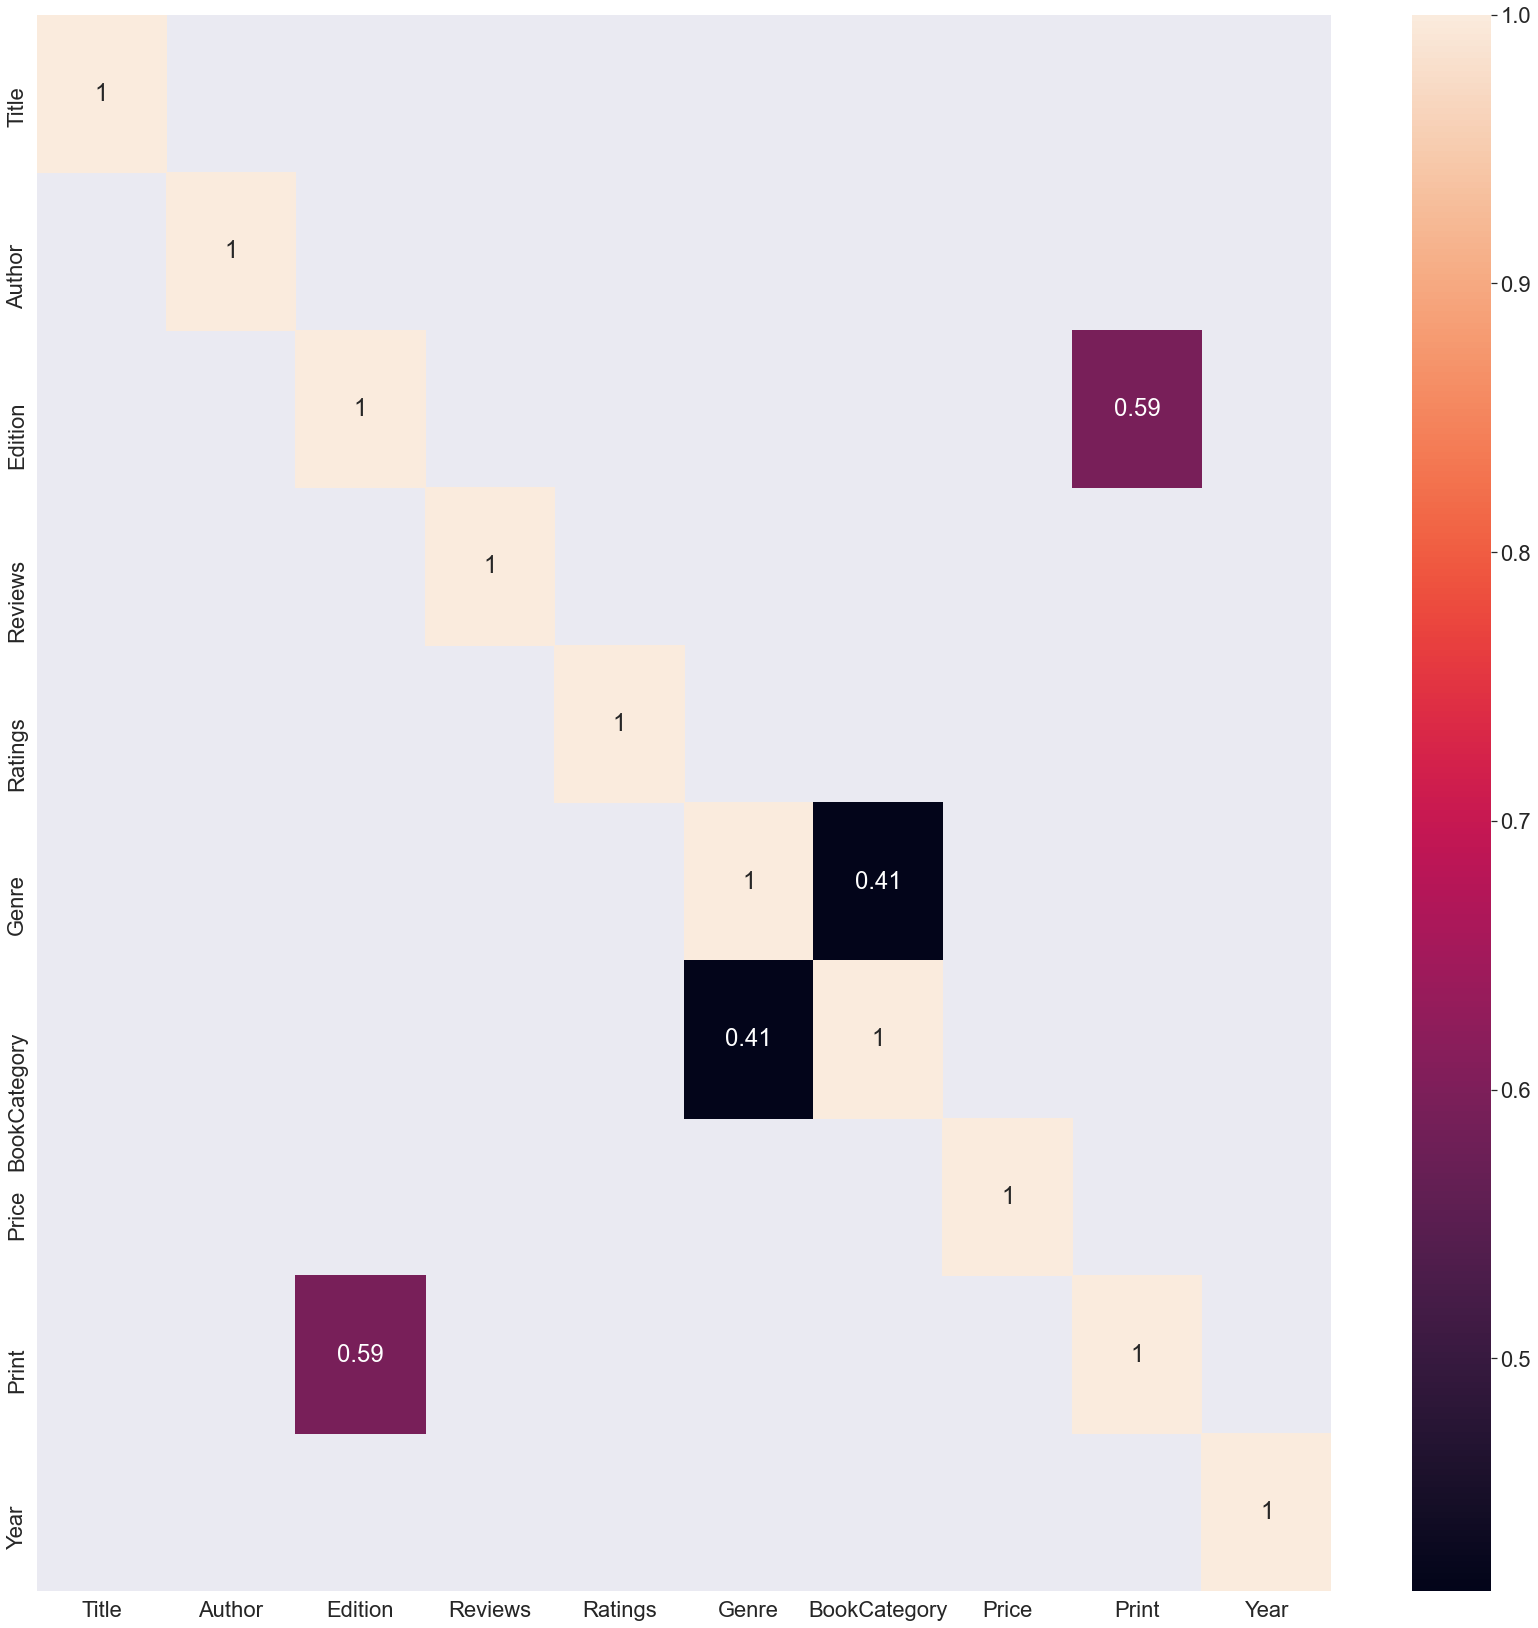

In [34]:
#calculate column correlations and make a seaborn heatmap - Before standardisation
corr = df_train.corr()
kot = corr[corr>=0.4]
plt.figure(figsize=(29,29))
#p.set(font_scale=2)
# setting the size of figure to 12 by 10
#p=sns.heatmap(kot, annot=True,square=True,annot_kws={'size':16})
#sns.color_palette("light:#5A9", as_cmap=True)
sns.set(font_scale=2)
heat_map = sns.heatmap(kot, annot=True)
plt.show()


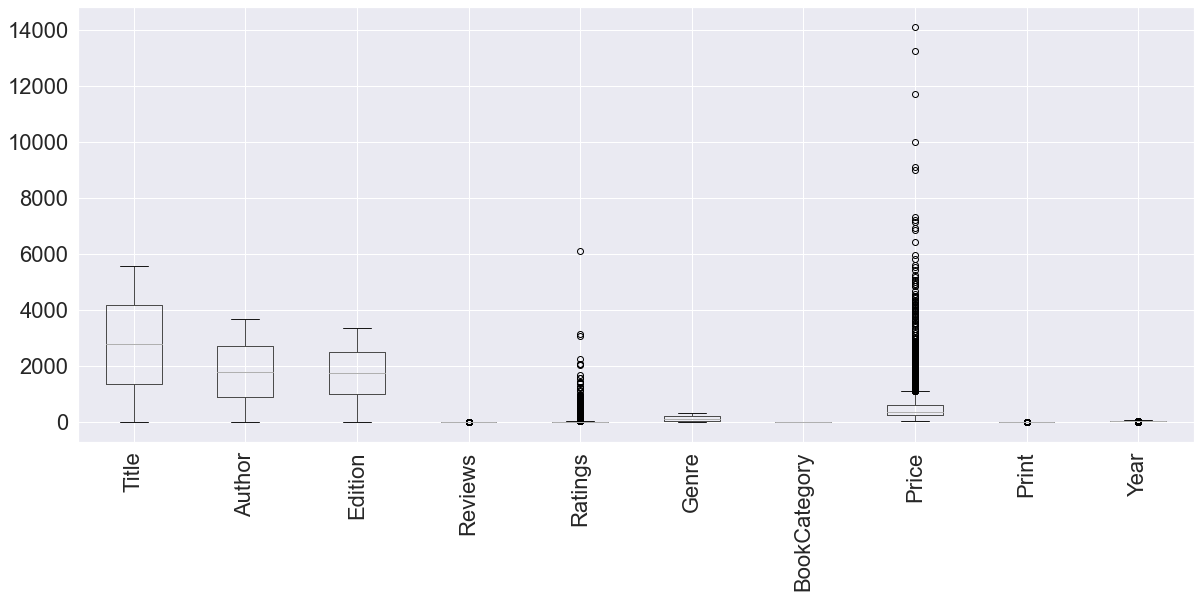

In [35]:
df_train.boxplot(figsize=(20,8))
plt.xticks(rotation=90)
plt.show()

In [36]:
df_test

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"
...,...,...,...,...,...,...,...,...
1555,100 Things Every Designer Needs to Know About ...,Susan Weinschenk,"Paperback,– 14 Apr 2011",5.0 out of 5 stars,4 customer reviews,We design to elicit responses from people. We ...,Design,"Computing, Internet & Digital Media"
1556,"Modern Letter Writing Course: Personal, Busine...",ARUN SAGAR,"Paperback,– 8 May 2013",3.6 out of 5 stars,13 customer reviews,"A 30-day course to write simple, sharp and att...",Children's Reference (Books),"Biographies, Diaries & True Accounts"
1557,The Kite Runner Graphic Novel,Khaled Hosseini,"Paperback,– 6 Sep 2011",4.0 out of 5 stars,5 customer reviews,The perennial bestseller-now available as a se...,Humour (Books),Humour
1558,Panzer Leader (Penguin World War II Collection),Heinz Guderian,"Paperback,– 22 Sep 2009",3.5 out of 5 stars,3 customer reviews,Heinz Guderian - master of the Blitzkrieg and ...,United States History,"Biographies, Diaries & True Accounts"


In [37]:
duplicate = df_test[df_test.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
1090,The Rustlers of the West Fork (Hopalong Cassidy),Louis L'Amour,"Mass Market Paperback,– 1 Apr 1992",5.0 out of 5 stars,2 customer reviews,"In this first of four classic frontier novels,...",Action & Adventure (Books),Action & Adventure
1095,The Princess Bride: S. Morgenstern's Classic T...,William Goldman,"Mass Market Paperback,– 26 Mar 2010",3.8 out of 5 stars,6 customer reviews,William Goldman's modern fantasy classic is a ...,Action & Adventure (Books),Action & Adventure
1103,Everybody Lies: The New York Times Bestseller,Seth Stephens-Davidowitz,"Paperback,– 18 Apr 2018",4.3 out of 5 stars,27 customer reviews,THE NEW YORK TIMES BESTSELLER\nAN ECONOMIST BO...,Political Structure & Processes (Books),Action & Adventure
1253,Flint,Louis L'Amour,"Mass Market Paperback,– 3 Nov 1997",4.3 out of 5 stars,4 customer reviews,"He left the West at the age of seventeen, leav...",Action & Adventure (Books),Action & Adventure
1316,The Five Greatest Warriors (Jack West Series),Matthew Reilly,"Paperback,– 25 Nov 2010",4.4 out of 5 stars,12 customer reviews,The end is approaching ... Can Jack West unrav...,Action & Adventure (Books),Action & Adventure
1340,Alita: Battle Angel – The Official Movie Novel...,Pat Cadigan,"Paperback,– 14 Feb 2019",3.9 out of 5 stars,7 customer reviews,The ofﬁcial novelization to the highly anticip...,Action & Adventure (Books),Action & Adventure
1407,The Curious Incident of the Dog in the Night-t...,Mark Haddon,"Paperback,– 2 Aug 2012",4.0 out of 5 stars,96 customer reviews,A Children’s Bookshelf Selection: Each month o...,Action & Adventure (Books),Action & Adventure
1453,Storm and Silence: Volume 1 (Storm and Silence...,Robert Thier,"Paperback,– 19 Mar 2016",5.0 out of 5 stars,59 customer reviews,Freedom - that is what Lilly Linton wants most...,Action & Adventure (Books),Action & Adventure


In [38]:
### Examine missing values
df_na = df_test.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

Series([], dtype: int64)

In [39]:
df_test.isnull().sum().sort_values(ascending = False)/df_train.index.size

Title           0.0
Author          0.0
Edition         0.0
Reviews         0.0
Ratings         0.0
Synopsis        0.0
Genre           0.0
BookCategory    0.0
dtype: float64

In [40]:
df_test['Reviews'] = df_test['Reviews'].str[:3]

In [42]:
df_test['Year'] = df_test['Edition'].str[-4:]

In [43]:
df_test['Ratings'] = df_test['Ratings'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [44]:
df_test["Print"]=np.where(df_test["Edition"].str.contains(r'Paperback'),'Paperback','Hardcover')

In [45]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df_test['Title']= label_encoder.fit_transform(df_test['Title'])
df_test['Author']= label_encoder.fit_transform(df_test['Author'])
df_test['Edition']= label_encoder.fit_transform(df_test['Edition'])
df_test['Genre']= label_encoder.fit_transform(df_test['Genre'])
df_test['BookCategory']= label_encoder.fit_transform(df_test['BookCategory'])
df_test['Print']= label_encoder.fit_transform(df_test['Print'])
df_test['Year']= label_encoder.fit_transform(df_test['Year'])




In [46]:
df_test.drop('Synopsis', axis=1, inplace=True)

In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1560 non-null   int32 
 1   Author        1560 non-null   int32 
 2   Edition       1560 non-null   int32 
 3   Reviews       1560 non-null   object
 4   Ratings       1560 non-null   int32 
 5   Genre         1560 non-null   int32 
 6   BookCategory  1560 non-null   int32 
 7   Year          1560 non-null   int32 
 8   Print         1560 non-null   int32 
dtypes: int32(8), object(1)
memory usage: 61.1+ KB


In [48]:
df_test['Reviews'] = pd.to_numeric(df_test['Reviews'], errors='coerce')

In [49]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [50]:
((df_test > UL) | (df_test < LL)).sum()

<ipython-input-50-31bdc84346c4>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df_test > UL) | (df_test < LL)).sum()
<ipython-input-50-31bdc84346c4>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df_test > UL) | (df_test < LL)).sum()


Author            0
BookCategory      0
Edition           0
Genre             0
Price             0
Print           249
Ratings         166
Reviews          33
Title             0
Year            605
dtype: int64

In [51]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1560 non-null   int32  
 1   Author        1560 non-null   int32  
 2   Edition       1560 non-null   int32  
 3   Reviews       1560 non-null   float64
 4   Ratings       1560 non-null   int32  
 5   Genre         1560 non-null   int32  
 6   BookCategory  1560 non-null   int32  
 7   Year          1560 non-null   int32  
 8   Print         1560 non-null   int32  
dtypes: float64(1), int32(8)
memory usage: 61.1 KB


In [52]:
# Copy all the predictor variables into X dataframe
X_train = df_train.drop('Price', axis=1)

# Copy target into the y dataframe.  
y_train = df_train['Price']

In [53]:
X_test = df_test

In [54]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [55]:
model.feature_importances_

array([0.11302878, 0.12247086, 0.14305252, 0.09084391, 0.09550647,
       0.12586158, 0.11434985, 0.06245697, 0.13242906])

In [56]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200,num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf  = [1,2,5,10]

In [57]:
grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
       'min_samples_leaf': min_samples_leaf}
print(grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [58]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestRegressor() 
hyp = RandomizedSearchCV(estimator = model,
                        param_distributions=grid,
                        n_iter=10,
                       scoring= 'neg_mean_squared_error',
                        cv=5,verbose = 2,
                        random_state = 42,n_jobs = 1) 
hyp.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  16.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  19.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [59]:
y_pred = hyp.predict(X_test)
y_pred

array([1054.13495667, 1873.009997  , 1352.94637   , ..., 1856.55046017,
       2303.34076158, 1660.00985   ])

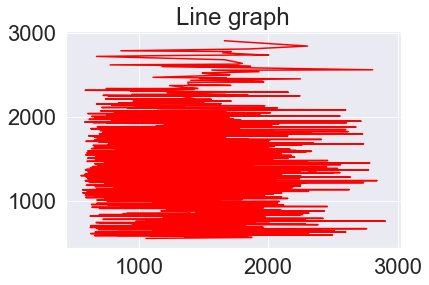

In [60]:
x = y_pred
y = np.sort(x)

plt.title("Line graph")
plt.plot(x, y, color="red")

plt.show()

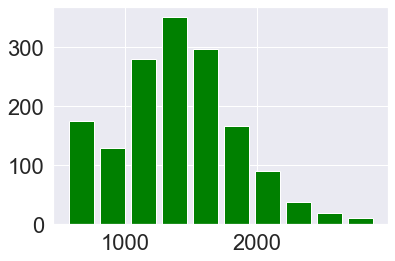

In [61]:
plt.hist(y_pred, color = 'green',
        histtype = 'bar', rwidth = 0.8)
plt.show()

In [62]:
array = y_pred
dataframe = pd.DataFrame(array) 
#dataframe.to_csv(r"C:\Users\athisya\Downloads\Great Learning\hackathon\Predict The Price Of Books\Participants_Data\data1.csv")

In [63]:
#res["Survived"] = pd.DataFrame(ytest_predict)

res = pd.DataFrame(y_pred)
res.columns = ["Price"]


In [64]:
res

,Price
0,1054.134957
1,1873.009997
2,1352.946370
3,1653.003310
4,1089.509308
...,...
1555,1712.790829
1556,860.223150
1557,1856.550460
1558,2303.340762


In [65]:
#res.set_index('Price')
res = res.set_index('Price')
res.to_csv("prediction_results.csv")

In [66]:
res

""
Price
1054.134957
1873.009997
1352.946370
1653.003310
1089.509308
...
1712.790829
860.223150
1856.550460
